# Exploratory Data Analysis

This is an exploratory data analysis of an Epidermal Growth Factor Receptor (EGFR) kinase dataset that contains 4.6k compounds that have undergone experimental testing against EFGR, a target associated with various cancers. 

In [3]:
#Python standard libraries
import time
import warnings
from pathlib import Path
from warnings import filterwarnings
import time
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

import torch

#selected plotting functions
# from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#Silence some expected warnings
filterwarnings("ignore")

#Fix seed for reproducible results
SEED = 22
torch.manual_seed(SEED)

In [4]:
# Read data from previous talktorials
chembl_df = pd.read_csv( "pIC50_prediction/data/EGFR_compounds_lipinski.csv", index_col=0)

# Look at head
print("Shape of dataframe : ", chembl_df.shape)
chembl_df.head()

Shape of dataframe :  (4635, 10)


,molecule_chembl_id,IC50,units,smiles,pIC50,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
0,CHEMBL63786,0.003,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879,349.021459,3,1,5.2891,True
1,CHEMBL35820,0.006,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849,387.058239,5,1,4.9333,True
2,CHEMBL53711,0.006,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849,343.043258,5,1,3.5969,True
3,CHEMBL66031,0.008,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910,339.011957,4,2,4.0122,True
4,CHEMBL53753,0.008,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910,329.027607,5,2,3.5726,True


In [5]:
# Split dataframe into train and test set
train, test = train_test_split(chembl_df, test_size=0.2, random_state=SEED, shuffle=True)

In [6]:
train

,molecule_chembl_id,IC50,units,smiles,pIC50,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
3135,CHEMBL485070,400.0,nM,CCOc1cc(/C=C(\C#N)C(N)=O)cc(CSc2ccccc2)c1O,6.397940,354.103813,5,2,3.47548,True
4597,CHEMBL4202780,6070.0,nM,COc1cc(N2CCN(C)CC2)ccc1Nc1ncc(Cl)c(Oc2ccccc2NC...,5.216811,551.241166,9,2,4.48260,True
2137,CHEMBL3676348,65.0,nM,C=CC(=O)Nc1cc2c(Nc3ccc(Cl)nc3)ncnc2cc1OCCNC(C)=O,7.187087,426.120716,7,3,3.06120,True
3760,CHEMBL425402,1100.0,nM,Fc1ccc(Nc2ncnc3c2NCc2ccccc2O3)cc1Cl,5.958607,342.068367,5,2,4.73050,True
3495,CHEMBL116547,750.0,nM,COc1cc(/C=C(\C#N)C(=O)c2ccc(O)c(O)c2)cc(CSCc2c...,6.124939,447.114044,7,3,5.03528,True
...,...,...,...,...,...,...,...,...,...,...
3143,CHEMBL1830280,410.0,nM,NC(=S)N/N=C(/C=C/c1cccc2ccccc12)c1ccccc1,6.387216,331.114319,2,2,4.09050,True
3647,CHEMBL3133906,931.0,nM,C=CC(=O)Nc1ccc2ncnc(Nc3ccc(OC)cc3OC)c2c1,6.031050,350.137890,6,2,3.51510,True
5519,CHEMBL449114,400000.0,nM,N#CC(C#N)=C(C#N)c1cccc(O)c1,3.397940,195.043262,4,1,1.71654,True
409,CHEMBL4206288,2.1,nM,CN1CCN(c2ccc(Nc3cc4c(N5CCOCC5)nc(Nc5ccccc5)nc4...,8.677781,497.265157,10,2,3.49540,True


## Exploratory Data Analysis

In [7]:
train.describe()

,IC50,pIC50,molecular_weight,n_hba,n_hbd,logp
count,3.708000e+03,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000
mean,2.434615e+04,6.596884,414.796216,5.985437,1.894822,4.080428
std,4.342665e+05,1.423330,87.402387,1.877070,1.009662,1.194282
min,6.000000e-03,1.602060,110.036779,0.000000,0.000000,-5.994500
25%,2.000000e+01,5.467567,354.126783,5.000000,1.000000,3.429775
50%,2.565000e+02,6.590913,419.172491,6.000000,2.000000,4.165700
75%,3.407500e+03,7.698970,476.159498,7.000000,3.000000,4.813025
max,2.500000e+07,11.221849,704.185617,11.000000,8.000000,8.782600


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3708 entries, 3135 to 3627
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  3708 non-null   object 
 1   IC50                3708 non-null   float64
 2   units               3708 non-null   object 
 3   smiles              3708 non-null   object 
 4   pIC50               3708 non-null   float64
 5   molecular_weight    3708 non-null   float64
 6   n_hba               3708 non-null   int64  
 7   n_hbd               3708 non-null   int64  
 8   logp                3708 non-null   float64
 9   ro5_fulfilled       3708 non-null   bool   
dtypes: bool(1), float64(4), int64(2), object(3)
memory usage: 293.3+ KB


In [9]:
# confirm no missing values: 
train.isnull().sum()  

molecule_chembl_id    0
IC50                  0
units                 0
smiles                0
pIC50                 0
molecular_weight      0
n_hba                 0
n_hbd                 0
logp                  0
ro5_fulfilled         0
dtype: int64

In [10]:
#check for duplicated rows
train.duplicated().sum()

0

All rows are unique.

In [11]:
#add label column for pIC50 > 8
train["label"] = np.where(train["pIC50"]>8, 1,0)

In [12]:
train

,molecule_chembl_id,IC50,units,smiles,pIC50,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled,label
3135,CHEMBL485070,400.0,nM,CCOc1cc(/C=C(\C#N)C(N)=O)cc(CSc2ccccc2)c1O,6.397940,354.103813,5,2,3.47548,True,0
4597,CHEMBL4202780,6070.0,nM,COc1cc(N2CCN(C)CC2)ccc1Nc1ncc(Cl)c(Oc2ccccc2NC...,5.216811,551.241166,9,2,4.48260,True,0
2137,CHEMBL3676348,65.0,nM,C=CC(=O)Nc1cc2c(Nc3ccc(Cl)nc3)ncnc2cc1OCCNC(C)=O,7.187087,426.120716,7,3,3.06120,True,0
3760,CHEMBL425402,1100.0,nM,Fc1ccc(Nc2ncnc3c2NCc2ccccc2O3)cc1Cl,5.958607,342.068367,5,2,4.73050,True,0
3495,CHEMBL116547,750.0,nM,COc1cc(/C=C(\C#N)C(=O)c2ccc(O)c(O)c2)cc(CSCc2c...,6.124939,447.114044,7,3,5.03528,True,0
...,...,...,...,...,...,...,...,...,...,...,...
3143,CHEMBL1830280,410.0,nM,NC(=S)N/N=C(/C=C/c1cccc2ccccc12)c1ccccc1,6.387216,331.114319,2,2,4.09050,True,0
3647,CHEMBL3133906,931.0,nM,C=CC(=O)Nc1ccc2ncnc(Nc3ccc(OC)cc3OC)c2c1,6.031050,350.137890,6,2,3.51510,True,0
5519,CHEMBL449114,400000.0,nM,N#CC(C#N)=C(C#N)c1cccc(O)c1,3.397940,195.043262,4,1,1.71654,True,0
409,CHEMBL4206288,2.1,nM,CN1CCN(c2ccc(Nc3cc4c(N5CCOCC5)nc(Nc5ccccc5)nc4...,8.677781,497.265157,10,2,3.49540,True,1


In [13]:
#remove pIC50 as a feature
train.drop(columns=["pIC50","IC50"], inplace=True)

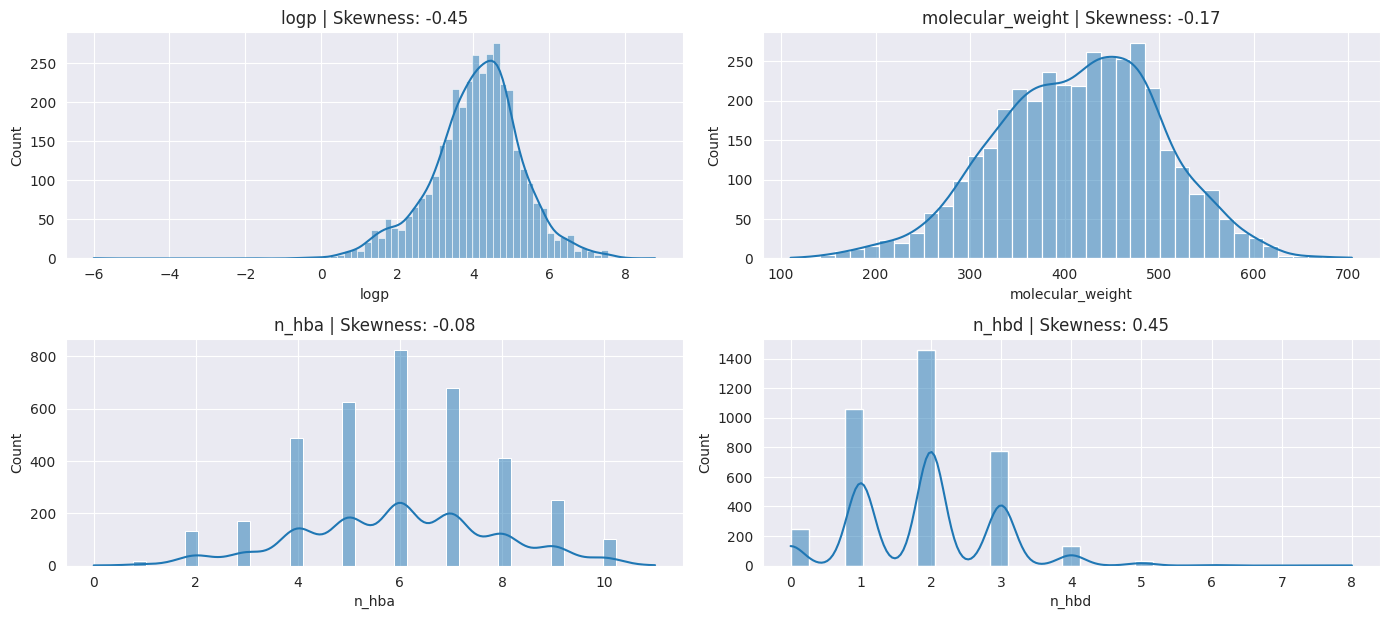

In [14]:
#visualise distribution of numerical features
# Set Seaborn style 
sns.set_style("darkgrid") 
  
# Identify numerical columns 
numerical_columns = train.select_dtypes(include=["int64", "float64"]).columns.difference(['label'])
  
# Plot distribution of each numerical feature 
plt.figure(figsize=(14, len(numerical_columns) * 3)) 
for idx, feature in enumerate(numerical_columns, 1): 
    plt.subplot(len(numerical_columns), 2, idx) 
    sns.histplot(train[feature], kde=True) 
    plt.title(f"{feature} | Skewness: {round(train[feature].skew(), 2)}") 
  
# Adjust layout and show plots 
plt.tight_layout() 
plt.show() 

<Axes: xlabel='label', ylabel='count'>

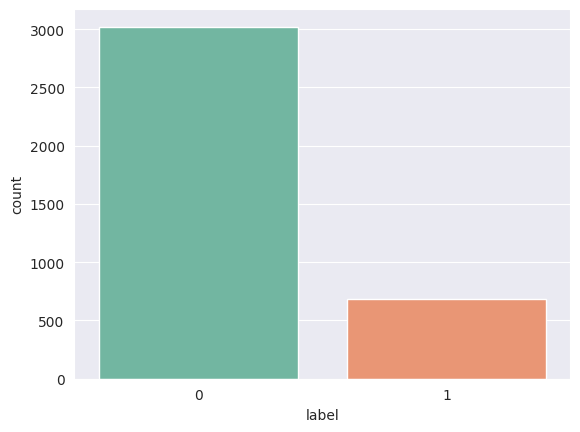

In [15]:
#Plot the unique values of categorical variables
sns.countplot(x ='label', data = train, palette = "Set2")

In [16]:
#count 0 and 1 labels
print(train['label'].value_counts()[0])
print(train['label'].value_counts()[1])

3021
687


Positive: Negative label has ~ 1:5 ratio.

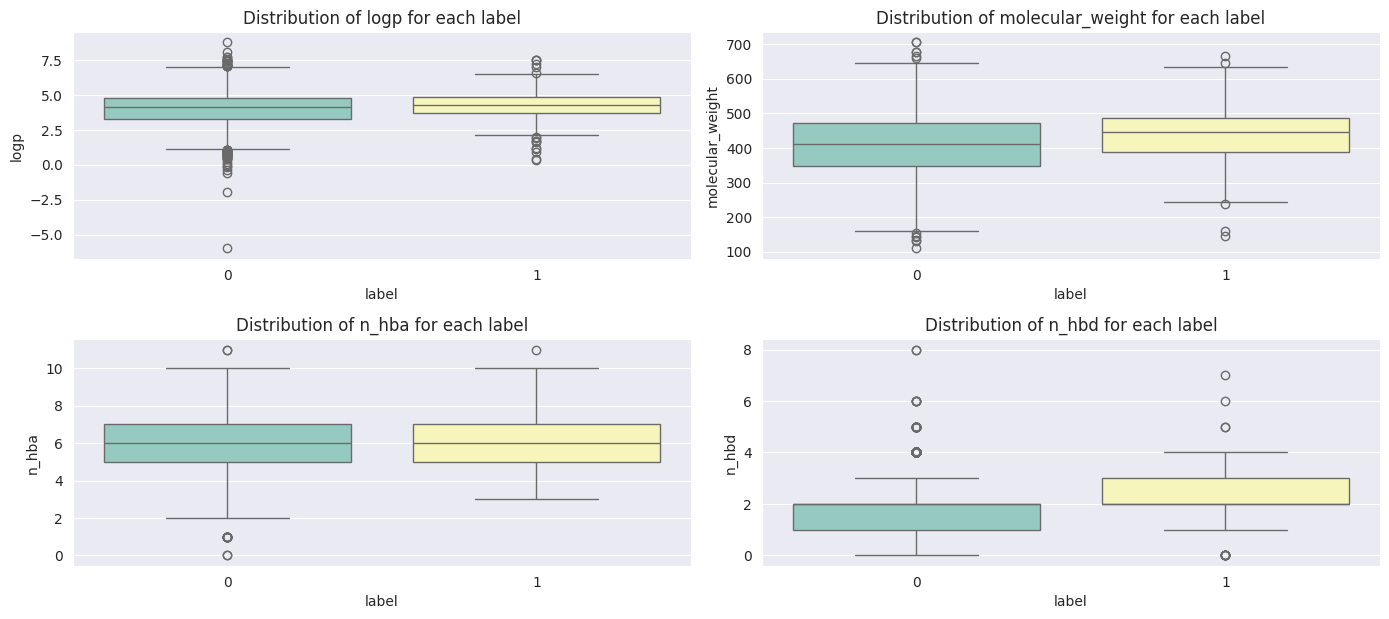

In [17]:
plt.figure(figsize=(14, len(numerical_columns) * 3)) 
for idx, feature in enumerate(numerical_columns, 1): 
    plt.subplot(len(numerical_columns), 2, idx) 
    sns.boxplot(data=train, y=feature, x='label', palette='Set3')
    plt.title(f"Distribution of {feature} for each label") 
  
# Adjust layout and show plots 
plt.tight_layout() 
plt.show() 

In [18]:
#correlation of numerical features
train.select_dtypes(include=["int64", "float64"]).corr()

,molecular_weight,n_hba,n_hbd,logp,label
molecular_weight,1.000000,0.621122,0.235278,0.405698,0.146157
n_hba,0.621122,1.000000,0.214834,-0.152291,0.119833
n_hbd,0.235278,0.214834,1.000000,-0.125048,0.107441
logp,0.405698,-0.152291,-0.125048,1.000000,0.080532
label,0.146157,0.119833,0.107441,0.080532,1.000000


<Axes: >

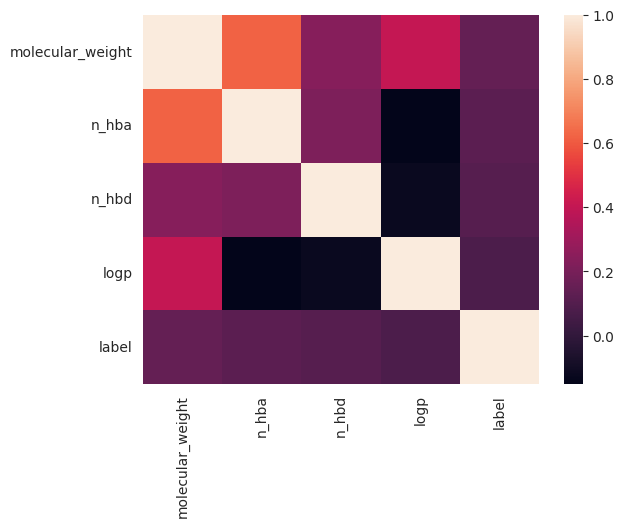

In [19]:
#Correlation plot
sns.heatmap(train.select_dtypes(include=["int64", "float64"]).corr())

Label is not linearly correlated with any of the features 

In [20]:
# Compare categorical variables
CrosstabResult=pd.crosstab(index=train['label'],columns=train['ro5_fulfilled'])
print(CrosstabResult)

ro5_fulfilled  True
label              
0              3021
1               687


In [21]:
print(train['ro5_fulfilled'].value_counts())

ro5_fulfilled
True    3708
Name: count, dtype: int64


ro5_fulfilled is true for both labels so not a very useful feature

In [25]:
#save train and test files to csv
train.to_csv("pIC50_prediction/data/train.csv")
test.to_csv("pIC50_prediction/data/test.csv")